In [100]:
import pandas as pd
import requests

url = "https://codeforces.com/api/user.rating?handle=tourist"
response = requests.get(url)
data = response.json()


In [101]:
data

{'status': 'OK',
 'result': [{'contestId': 2,
   'contestName': 'Codeforces Beta Round 2',
   'handle': 'tourist',
   'rank': 14,
   'ratingUpdateTimeSeconds': 1267124400,
   'oldRating': 0,
   'newRating': 1602},
  {'contestId': 8,
   'contestName': 'Codeforces Beta Round 8',
   'handle': 'tourist',
   'rank': 5,
   'ratingUpdateTimeSeconds': 1270748700,
   'oldRating': 1602,
   'newRating': 1764},
  {'contestId': 10,
   'contestName': 'Codeforces Beta Round 10',
   'handle': 'tourist',
   'rank': 18,
   'ratingUpdateTimeSeconds': 1271353500,
   'oldRating': 1764,
   'newRating': 1878},
  {'contestId': 13,
   'contestName': 'Codeforces Beta Round 13',
   'handle': 'tourist',
   'rank': 11,
   'ratingUpdateTimeSeconds': 1273161600,
   'oldRating': 1878,
   'newRating': 1967},
  {'contestId': 19,
   'contestName': 'Codeforces Beta Round 19',
   'handle': 'tourist',
   'rank': 2,
   'ratingUpdateTimeSeconds': 1277398800,
   'oldRating': 1967,
   'newRating': 2063},
  {'contestId': 23,
  

In [102]:
data['result'][0]

y: list = [val['newRating'] for val in data['result']]


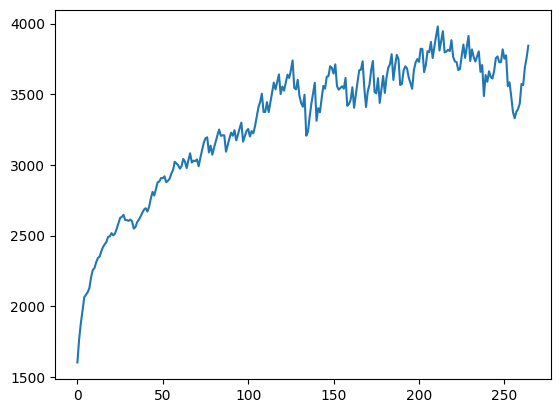

In [103]:
import matplotlib.pyplot as plt
import numpy as np

data = y

plt.plot(data)


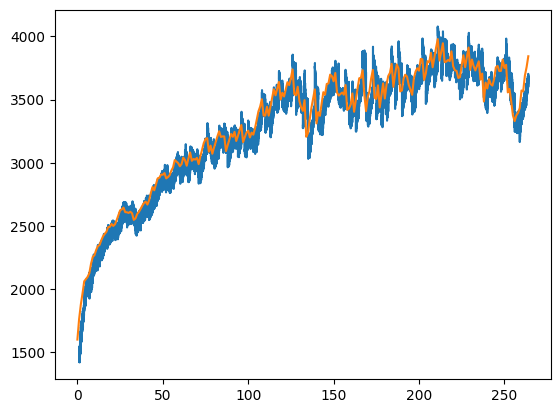

In [104]:
x: list = []
ys: list = []
for i in range(1, len(y) - 1):
    t = np.arange(i, i + 1, 0.01)
    x.extend(t)
    ys.extend((y[i + 1] - y[i]) * t + (y[i - 1] - (y[i + 1] - y[i]) * x[-1]))

noise = np.random.normal(-30, 30, len(ys))  # Mean = 0, Stddev = 1
ys = np.array(ys) + noise

plt.plot(x, ys)
plt.plot(range(len(data)), data)

x = np.array(x)


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

gbr = GradientBoostingRegressor( n_estimators=10, max_depth=2, random_state=0)
gbr.fit(x.reshape(-1,1), ys)

GradientBoostingRegressor(max_depth=2, n_estimators=10, random_state=0)

In [106]:
x

array([  1.  ,   1.01,   1.02, ..., 263.97, 263.98, 263.99])

In [107]:
x_predict = []
y_predict = []
for i in range(1, 400):
    x_predict.append(i)
    i = np.array(i).reshape(-1,1)
    y_predict.append(gbr.predict(i.reshape(-1,1)))
    

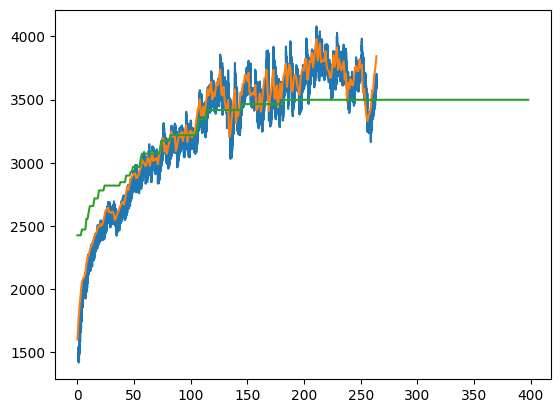

In [108]:
plt.plot(x, ys)
plt.plot(range(len(data)), data)
plt.plot(range(len(x_predict)), y_predict)

In [109]:
import tensorflow as tf